In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from imageio import imread
from skimage.transform import resize
from scipy.ndimage.filters import convolve
from numpy.linalg import svd, matrix_rank

(256, 256)


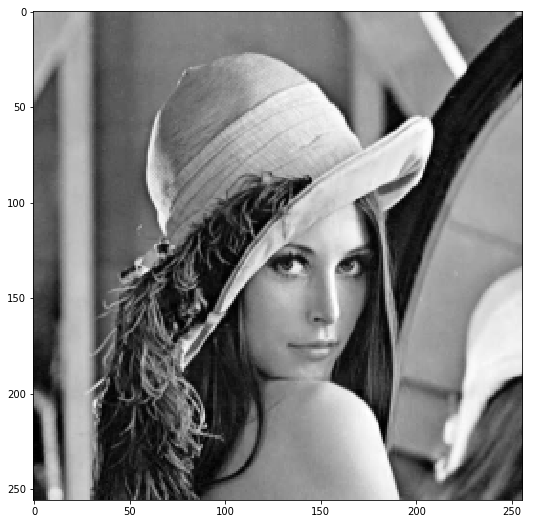

In [2]:
im = imread("../imageProcessing/samples/lena.jpg", pilmode="L")
im = resize(im, (256,256), mode="reflect", anti_aliasing=True)
im = (im * 255).astype(np.uint8)

print(im.shape)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(im, cmap=plt.cm.gray)
plt.show()

def gauss_filter(size=5, sigma=1):
    """
    creates gaussian kernel with a given size and sigma
    """
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))

    return kernel / kernel.sum()

# Exersice 2: Spatial Filtering (Convolution)

**Filtering** is a discrete convolution of an image $I$ with a filter mask $A \in \mathbb{R}^{m \times n}$:

$$
\begin{align}
 I_{A}       &= I * A \\
 I_{A}(i, j) &= \left(I * A\right)(i, j) \\
                                       &= \sum_{h=-\frac{m}{2}}^{\frac{m}{2}} \sum_{k=-\frac{n}{2}}^{\frac{n}{2}} A\left(h + \frac{m}{2} , k+\frac{n}{2}\right) \cdot I(i-h, j-k)
\end{align}
$$

Typically, the filter masks are square matrices, meaning $n=m$.
A special filter mask can be a **box filter**:

$$
\begin{align}
  B =%
  \dfrac{1}{9}\begin{pmatrix}
              1&1&1\\1&1&1\\1&1&1
             \end{pmatrix}.
\end{align}
$$

## Task 3 - Separable Filters
A 2D convolution filter $C \in \mathbb{R}^{m \times n}$ is called **separable**, if it is possible to decompose it into two 1D convolution filters $D_1 \in \mathbb{R}^{m}$ and $D_2 \in \mathbb{R}^{n}$ such that

$$
\begin{align}
  \forall I \in \mathbb{R}^{k \times l}: \quad I * C = (I * D_1) * D_2
\end{align}
$$

As the convolution is associative, this can be expressed in closed form 
$$
C = D_1 * D_2
$$

and since $D_1$ and $D_2$ are column and row vectors, the condition is equivalent to 

$$
C = D_1 D_2^\top
$$

- Given a matrix $C$, how can we compute suitable vectors $D_1$ and $D_2$? How can you decide if a matrix $C$ is separable?
- Compare the runtime of <code>scipy.ndimage.filters.convolve</code> for separable and non-separable filters of different sizes. Visualize the runtimes in a plot!
- **Challenge yourself**: modify your function from task 1 so that it checks if the given 2D filter is separable and if it is the case, than it should separate the filter and perform two 1D convolutions. Compare now the runtime of your new function for separable and non-separable filters.

### Solutions

In [ ]:
def check_filter(mask):
    """ 
        returns True if mask is decomposable and
        False otherwise
    """
    return # FILL ME

def decompose(mask):
    """
        decomposes mask in two vectors
        Hint:
            Singular Value Decomposition
            https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html
    """

    D1 = # FILL ME
    D2 = # FILL ME
    
    return D1, D2


In [ ]:
size = 3
B = np.ones((size, size), dtype=np.float32) / size**2


print("=" * 30)
print("Filter: \n", B)
print("Is decomposable:", check_filter(B))
B1, B2 = decompose(B)
print("Decomposed Vectors", B1, B2, sep="\n")
print("Estimated Filter:\n", B1 @ B2)

# create a separable filter mask ("Gaussian")
H = gauss_filter(size)

print("=" * 30)
print("Filter: \n", H)
print("Is decomposable:", check_filter(H))
H1, H2 = decompose(H)
print("Decomposed Vectors", H1, H2, sep="\n")
print("Estimated Filter:\n", H1 @ H2)



In [ ]:
def plot_runtimes(im, sizes, conv_func):
    xs = sizes
    ys_sep = []
    ys_nonsep = []
    
    for size in sizes:
        sep_filter = gauss_filter(size)
        non_sep_filter = np.random.randn(size, size)
        
        t0 = time.time()
        _res = conv_func(im, sep_filter)
        t1 = time.time()
        ys_sep.append(t1 - t0)
        
        t0 = time.time()
        _res = conv_func(im, non_sep_filter)
        t1 = time.time()
        ys_nonsep.append(t1 - t0)
        
    
    fig, ax = plt.subplots(figsize=(16,9))
    
    ax.set_title("Runtimes of \"{}\"".format(conv_func.__name__))
    ax.set_xlabel("Filter Size")
    ax.set_ylabel("Runtime in ms")
    
    ax.plot(xs, ys_sep, label="Separable Filters")
    ax.plot(xs, ys_nonsep, label="Non-Separable Filters")
    
    ax.legend()
    
    plt.show()
    plt.close()

    
sizes = [3,5,7,9,13,17,25,55,75,123]
plot_runtimes(im, sizes, convolve)

In [ ]:
def imfilter2(im, mask, mode="edge"):
    # get the code from task 1
    pass

def imfilter3(im, mask):
    """
        - check mask
        - decompose if possible and perform 2 convolutions
        - otherwise perform a single convolution with the mask
    """
    pass
    

sizes = [3,5,7,9,13,17,25,55,75,123]
plot_runtimes(im, sizes, imfilter2)
plot_runtimes(im, sizes, imfilter3)